In [1]:
#loading libraries 
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#loading dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


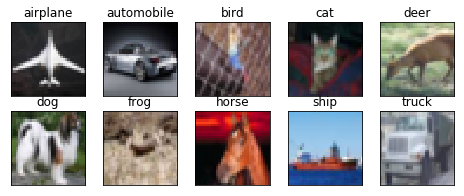

In [3]:
#class names and some dummy random images 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [4]:
train_features[1].shape

(32, 32, 3)

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

#loading model-- without cutout

In [7]:
from keras.models import model_from_json
modelpath = "/content/gdrive/My Drive/model_6A_WC.json"
weightpath = "/content/gdrive/My Drive/Deep-6A_WC.hdf5"

# load json and create model
json_file = open(modelpath, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weightpath)

W0629 08:24:57.047743 139846732412800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 08:24:57.099902 139846732412800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 08:24:57.152058 139846732412800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0629 08:24:57.153463 139846732412800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0629 08:24:57.154675 139846732

In [0]:
wrong_pred = []
i=0
for i in range(len(train_features)):
  img = train_features[i]
  img = np.expand_dims(img, axis=0)
  preds = loaded_model.predict(img)
  class_idx = np.argmax(preds[0])
  #print("predict ",class_idx , "original ",train_labels[i][0])
  if(train_labels[i] != class_idx):
    wrong_pred.append(i)
    i += 1
  if(i==30):
    break
  
  


In [11]:
wrong_pred

[0, 1, 2, 3, 7, 9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28]

#loading model -- without cutout

In [0]:
 from keras.models import model_from_json
modelpath = "/content/gdrive/My Drive/model_6A_C.json"
weightpath = "/content/gdrive/My Drive/Deep-6A_C.hdf5"

# load json and create model
json_file = open(modelpath, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(weightpath)

In [0]:
wrong_pred_c = []
i=0
for i in range(len(train_features)):
  img = train_features[i]
  img = np.expand_dims(img, axis=0)
  preds = model.predict(img)
  class_idx = np.argmax(preds[0])
  #print("predict ",class_idx , "original ",train_labels[i][0])
  if(train_labels[i] != class_idx):
    wrong_pred_c.append(i)
    i += 1
  if(i==30):
    break

In [14]:
wrongly_predicted_common = list(set(wrong_pred) & set(wrong_pred_c))
wrongly_predicted_common

[0, 1, 2, 3, 7, 9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28]

#Without Cutout

50


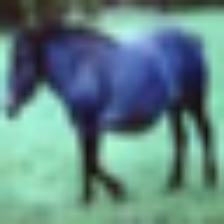

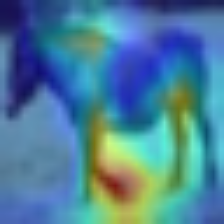

127


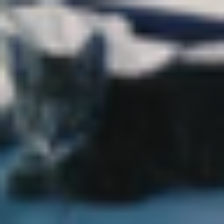

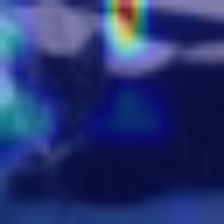

127


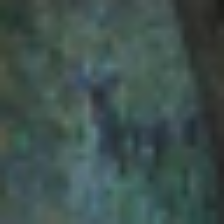

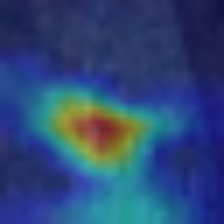

127


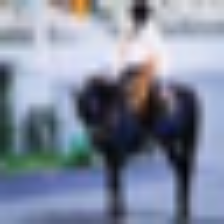

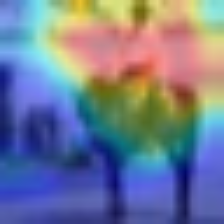

In [15]:
from google.colab.patches import cv2_imshow
j=0
for k in wrongly_predicted_common[4:8]:
  print(i)
  img = train_features[k]
  img = np.expand_dims(img, axis=0)
  preds = loaded_model.predict(img)
  class_idx = np.argmax(preds[0])
  class_output = loaded_model.output[:, class_idx]
  last_conv_layer = loaded_model.get_layer("sec_last")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([loaded_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img])
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = train_features[k]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  img = cv2.resize(img,(224,224))
  cv2_imshow(img)
  superimposed_img = cv2.resize(superimposed_img,(224,224))
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)
  j += 1
  if(j==4):
    break

#with Cutout

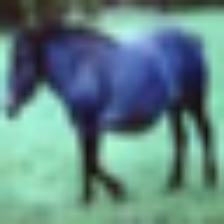

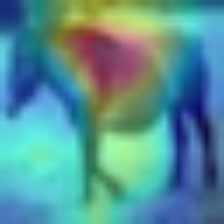

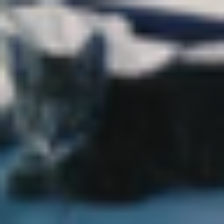

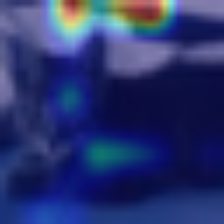

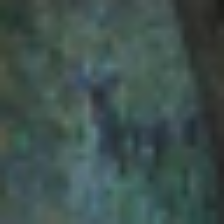

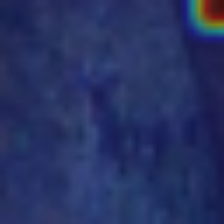

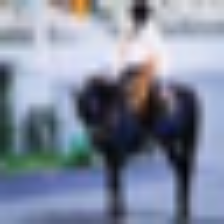

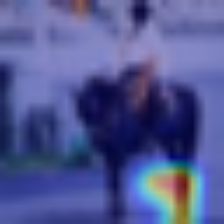

In [16]:
j=0
for k in wrongly_predicted_common[4:8]:
  img = train_features[k]
  img = np.expand_dims(img, axis=0)
  preds = model.predict(img)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("sec_last")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img])
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = train_features[k]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  img = cv2.resize(img,(224,224))
  cv2_imshow(img)
  superimposed_img = cv2.resize(superimposed_img,(224,224))
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)
  
  if(j==4):
    break